# Customer Spending Insights  
**Python Data Analysis Project**

Objective: Analyse retail transaction data to understand customer behaviour and identify marketing opportunities.

## 1. Importing Libraries

We load the core Python libraries for data analysis and visualisation. Pandas handles data manipulation, while Matplotlib and Seaborn help create clear, insightful charts.


In [27]:
import pandas as pd                     # Data manipulation and analysis
import matplotlib.pyplot as plt         # Base plotting library
import seaborn as sns                   # Statistical visualisation library

# Set a consistent style for all plots
sns.set(style="whitegrid")

## 2. Load Dataset

We import the customer shopping dataset into a pandas DataFrame so we can begin exploring and cleaning the data.

In [32]:
cdata = pd.read_csv('customer_shopping_data.csv')

In [34]:
cdata.head() # Preview the first few rows to confirm successful loading

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,8/05/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,11/09/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,5/16/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,10/24/2021,Kanyon


## 3. Initial Data Overview

We examine the structure of the dataset, including column names, data types, and the presence of missing values. This helps us understand the data quality before cleaning.

cdata.info() # Check the dataset structure and data types

We generate descriptive statistics to understand the central tendencies and variability of the numerical features. This helps identify unusual values, distributions, and potential data quality issues early.

In [42]:
cdata.describe() # Generate descriptive statistics for numerical columns

,age,quantity,price
count,99461.000000,99461.000000,99459.000000
mean,43.427796,3.003398,689.253423
std,14.990849,1.413029,941.195107
min,18.000000,1.000000,0.990000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,99.000000,5.000000,5250.000000


### Dataset Dimensions
We check the number of rows and columns to understand the overall size of the dataset before proceeding with data cleaning.

In [45]:
# Display the number of rows and columns in the dataset
cdata.shape

(99461, 10)

## 4. Data Cleaning & Preparation

### Checking for Missing Values
We identify the number of missing entries in each column. This helps determine which features require cleaning or imputation.


In [48]:
# Calculate missing values for each column
missing_values = cdata.isnull().sum()

# Display the count of missing entries
print(missing_values)

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             2
payment_method    1
invoice_date      0
shopping_mall     0
dtype: int64


### Insight
The dataset has minimal missing values: 2 in the *Price* column and 1 in *Payment_Method*. Given their very small proportion relative to the total dataset size, these records can be safely removed without affecting the overall analysis.

### Checking Unique Payment Methods
We review all unique payment method categories to understand how customers are completing their purchases and to identify any inconsistencies in the category labels.


In [52]:
# Display all unique categories in the payment_method column
cdata['payment_method'].unique()

array(['Credit Card', 'Debit Card', 'Cash', nan, '##error##', 'Cash Cash',
       'CreditCard'], dtype=object)

### Standardising Payment Method Categories
We correct inconsistent or invalid payment method labels to ensure the column is clean and usable for analysis. This includes fixing spelling variations and mapping erroneous or missing entries to the most reasonable category.

In [58]:
# Define a mapping to correct inconsistent payment method labels
payment_method_corrections = {
    'Credit Card' : 'Credit Card',
    'CreditCard'  : 'Credit Card',    # Fix spacing variation
    'Debit Card'  : 'Debit Card',
    'Cash'        : 'Cash',
    'Cash Cash'   : 'Cash',           # Remove duplication
    'Nan'         : 'Cash',           # Treat invalid label as Cash
    '##error##'   : 'Cash'            # Map erroneous entry to Cash
}

### Checking Unique Shopping Mall Names
We inspect the mall names to identify any inconsistencies or misspellings that may need correction before analysis.


In [61]:
# Display all unique shopping mall names in the dataset
cdata['shopping_mall'].unique()

array(['Kanyon', 'Forum Istanbul', 'Metrocity', 'Metropol AVM',
       'Istinye Park', 'Mall of Istanbul', 'Emaar Square Mall',
       'Cevahir AVM', 'Viaport Outlet', 'Zorlu Center', 'Mall Istanbul'],
      dtype=object)

### Insight
The shopping mall names appear consistent and do not require standardisation. Each value represents a distinct mall location, and no formatting issues or duplicates were detected.

### Checking Product Category Labels
We review all unique category names to detect spelling mistakes, inconsistent formatting, or duplicated labels that need standardisation before analysis.


In [67]:
# Display unique product categories as a list for easier inspection
list(cdata['category'].unique())

['Clothing',
 'Shoes',
 'Books',
 'Cosmetics',
 'Food & Beverage',
 'Toys',
 'Clothi',
 'Technology',
 'Toy',
 'Boks',
 'Souvenir',
 'Shoe',
 'Cosmetic',
 'Tech',
 'Food']

### Standardising Product Categories
The category column contains several misspellings and inconsistent variations (e.g., 'Clothi', 'Boks', 'Cosmetic', 'Tech'). We standardise these values to ensure clean, reliable grouping during analysis.


In [72]:
# Define a mapping to correct inconsistent or misspelled category labels
category_corrections = {
    'Clothing'        : 'Clothing',
    'Clothi'          : 'Clothing',        # Fix misspelling
    'Shoes'           : 'Shoes',
    'Shoe'            : 'Shoes',           # Singular → plural
    'Books'           : 'Books',
    'Boks'            : 'Books',           # Fix misspelling
    'Cosmetics'       : 'Cosmetics',
    'Cosmetic'        : 'Cosmetics',       # Singular → plural
    'Food & Beverage' : 'Food & Beverage',
    'Food'            : 'Food & Beverage', # Standardise to full label
    'Toys'            : 'Toys',
    'Toy'             : 'Toys',            # Singular → plural
    'Technology'      : 'Technology',
    'Tech'            : 'Technology',      # Abbreviation → full label
    'Souvenir'        : 'Souvenir'
}

# Apply the corrections to the category column
cdata['category'] = cdata['category'].replace(category_corrections)

### Insight
The category column contained multiple misspellings and inconsistent labels. After standardisation, the categories are now clean and ready for accurate segmentation and analysis.

### Checking Gender Categories
We inspect the unique gender values to ensure the labels are consistent and do not require standardisation.

In [76]:
# Display unique values in the gender column
list(cdata['gender'].unique())

['Female', 'Male', 'Mal']

### Standardising Gender Labels
A minor inconsistency was found in the gender column (‘Mal’ instead of ‘Male’). We correct this to ensure the gender categories are clean and reliable for analysis.

In [78]:
# Define a mapping to correct inconsistent gender labels
gender_corrections = {
    'Female' : 'Female',
    'Male'   : 'Male',
    'Mal'    : 'Male'     # Fix misspelling
}

# Apply the corrections to the gender column
cdata['gender'] = cdata['gender'].replace(gender_corrections)


### Applying Payment Method Corrections
We apply the standardisation mapping to clean the payment_method column and ensure all entries follow consistent category labels.


In [81]:
# Apply the standardisation mapping to the payment_method column
cdata['payment_method'] = cdata['payment_method'].replace(payment_method_corrections)

### Data Type Conversion
We convert categorical variables to the 'category' data type for better memory efficiency and clearer analysis. The invoice_date column is converted to a datetime format so that time-based analysis (e.g., monthly trends) can be performed accurately.


In [84]:
# Convert string-based categorical columns to 'category' dtype
cdata['gender']         = cdata['gender'].astype('category')
cdata['category']       = cdata['category'].astype('category')
cdata['payment_method'] = cdata['payment_method'].astype('category')
cdata['shopping_mall']  = cdata['shopping_mall'].astype('category')

# Convert invoice_date to datetime format
# errors='coerce' converts invalid dates to NaT (pandas' null datetime)
cdata['invoice_date'] = pd.to_datetime(cdata['invoice_date'], errors='coerce')


### Insight
Categorical variables have been optimised using the 'category' dtype, and invoice_date is now in a proper datetime format, enabling accurate time-series analysis.

### Checking for Duplicate Records
We identify duplicate rows in the dataset to ensure data quality. Duplicate entries can distort summary statistics and visualisations, so they must be detected and handled.

In [93]:
# Identify duplicated rows in the dataset
duplicates = cdata[cdata.duplicated()]

# Display duplicate records (if any)
print(duplicates)

Empty DataFrame
Columns: [invoice_no, customer_id, gender, age, category, quantity, price, payment_method, invoice_date, shopping_mall]
Index: []


### Insight
No duplicate records were detected, indicating the dataset is already clean in this area.

## 5. Exploratory Data Analysis (EDA)

### Distribution of Key Variables
We examine the distributions of age, price, and payment methods to understand customer demographics, spending patterns, and preferred payment options. This helps identify skewness, common value ranges, and any anomalies in the data.

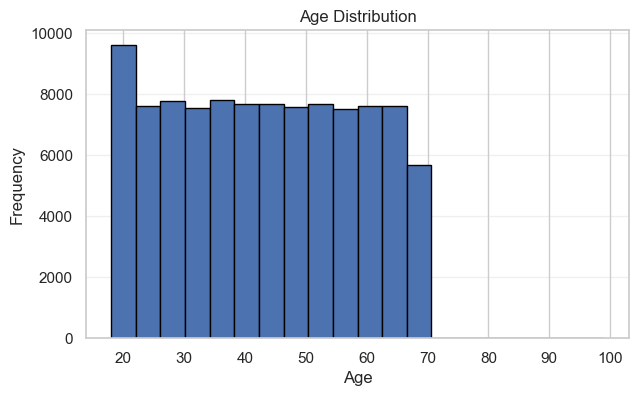

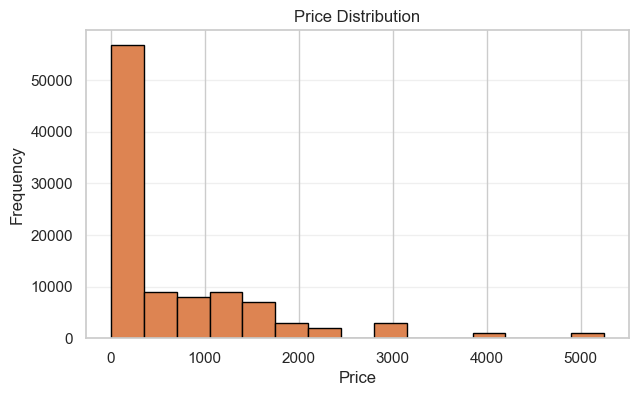

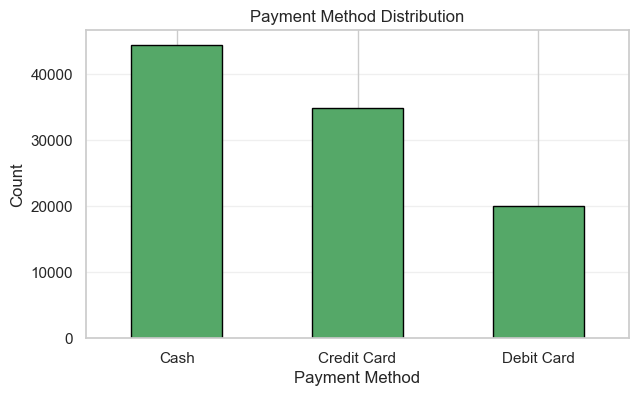

In [104]:
## 5. Exploratory Data Analysis (EDA)
age_color     = "#4C72B0"
price_color   = "#DD8452"
payment_color = "#55A868"


# -----------------------------
# Age Distribution
# -----------------------------
plt.figure(figsize=(7,4))
cdata['age'].hist(bins=20, edgecolor='black', color=age_color)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.grid(axis='y', alpha=0.3)
plt.show()

# -----------------------------
# Price Distribution
# -----------------------------
plt.figure(figsize=(7,4))
cdata['price'].hist(bins=15, edgecolor='black', color=price_color)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.grid(axis='y', alpha=0.3)
plt.show()

# -----------------------------
# Payment Method Distribution
# -----------------------------
plt.figure(figsize=(7,4))
cdata['payment_method'].value_counts().plot(
    kind='bar', 
    color=payment_color, 
    edgecolor='black'
)
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Payment Method Distribution')
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=0)
plt.show()

### Insights
- **Age Distribution:** The customer base is broad, with most shoppers between 25–60 years. There is no heavy skew toward a particular age group, which indicates that the mall attracts a diverse demographic.
- **Price Distribution:** Most purchases fall within low to mid-range prices, with a long right tail indicating occasional high-value transactions. This suggests a predominantly budget-conscious customer base with some premium buyers.
- **Payment Methods:** Cash is the most common payment method, followed by Credit Card and Debit Card. This indicates strong reliance on traditional payment modes, and opportunities to promote digital or card-based transactions.

### Boxplots for Numerical Variables
We use boxplots to identify the range, median, and potential outliers for key numerical features such as price, age, and quantity. This helps reveal data spread and detect extreme values that may influence analysis.

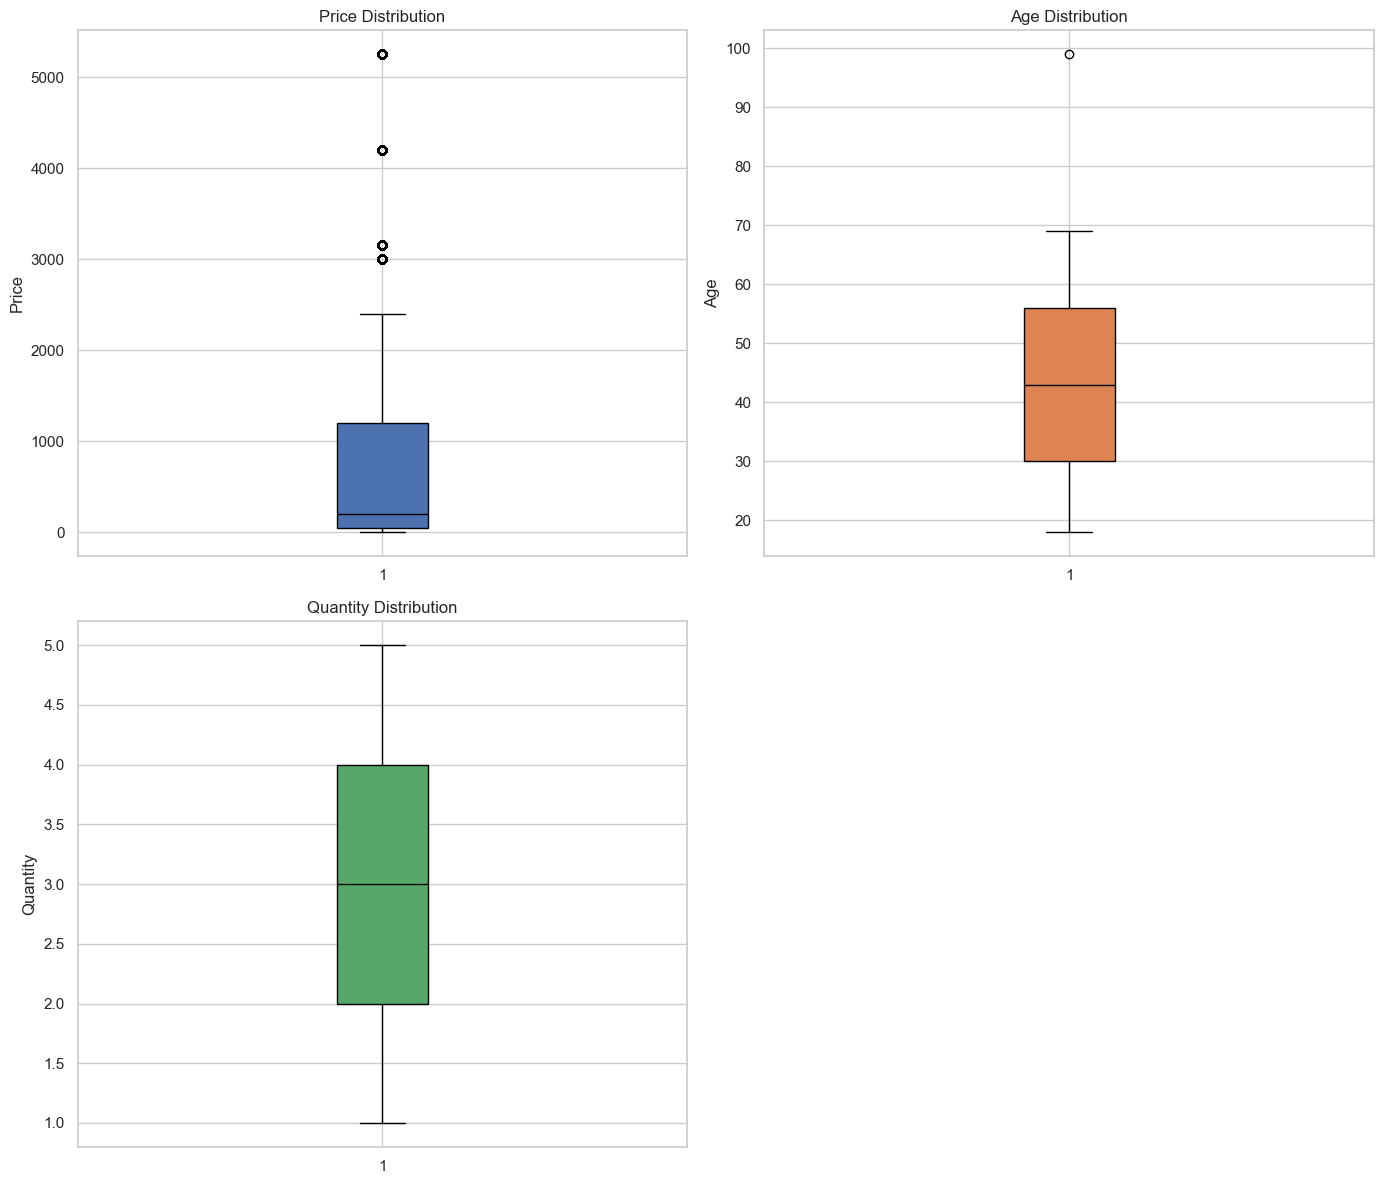

In [113]:
price_color    = "#4C72B0"   # steel blue
age_color      = "#DD8452"   # muted orange
quantity_color = "#55A868"   # teal green

plt.figure(figsize=(14, 12))

# -----------------------------
# Boxplot for Price
# -----------------------------
plt.subplot(2, 2, 1)
plt.boxplot(
    cdata['price'].dropna(),
    patch_artist=True,
    boxprops=dict(facecolor=price_color, color='black'),
    medianprops=dict(color='black')
)
plt.title('Price Distribution')
plt.ylabel('Price')

# -----------------------------
# Boxplot for Age
# -----------------------------
plt.subplot(2, 2, 2)
plt.boxplot(
    cdata['age'].dropna(),
    patch_artist=True,
    boxprops=dict(facecolor=age_color, color='black'),
    medianprops=dict(color='black')
)
plt.title('Age Distribution')
plt.ylabel('Age')

# -----------------------------
# Boxplot for Quantity
# -----------------------------
plt.subplot(2, 2, 3)
plt.boxplot(
    cdata['quantity'].dropna(),
    patch_artist=True,
    boxprops=dict(facecolor=quantity_color, color='black'),
    medianprops=dict(color='black')
)
plt.title('Quantity Distribution')
plt.ylabel('Quantity')

plt.tight_layout()
plt.show()

### Insights from Boxplots

- **Price:**  
  The price distribution is heavily right-skewed with several high outliers.  
  Most purchases fall into a low to mid-price range, but occasional premium purchases (4,000–5,000 range) strongly stretch the upper tail.  
  This indicates a mixed customer base and suggests the presence of both budget shoppers and high-value buyers.

- **Age:**  
  Customers mostly fall between **30 and 55 years**, with a median around the early 40s.  
  A few older outliers (around 90+) appear, but overall the age distribution is stable and reasonable.  
  This indicates that the shopping malls attract middle-aged adults primarily.

- **Quantity:**  
  Purchases typically involve **1 to 4 units**, with very few extreme values.  
  The distribution is tight, showing predictable purchasing behaviour — customers generally buy small quantities, which is normal for retail mall transactions.


### Detecting Price Outliers Using the IQR Method
We use the Interquartile Range (IQR) technique to identify unusually high or low prices. This helps reveal extreme transactions that may impact analysis or represent rare premium purchases.


In [116]:
# Calculate Q1, Q3 and IQR for price
q1_price = cdata['price'].quantile(0.25)
q3_price = cdata['price'].quantile(0.75)
iqr_price = q3_price - q1_price

# Calculate upper and lower bounds for outliers
upper_bound_price = q3_price + 1.5 * iqr_price
lower_bound_price = q1_price - 1.5 * iqr_price

# Identify outliers
outliers_lower = cdata[cdata['price'] < lower_bound_price]
outliers_upper = cdata[cdata['price'] > upper_bound_price]

# Display results
print("25th Percentile (Q1):", q1_price)
print("75th Percentile (Q3):", q3_price)
print("Interquartile Range (IQR):", iqr_price)
print("Upper Bound for Outliers:", upper_bound_price)
print("Lower Bound for Outliers:", lower_bound_price)

print("\nOutliers below the lower bound:")
print(outliers_lower)

print("\nOutliers above the upper bound:")
print(outliers_upper)

25th Percentile (Q1): 45.45
75th Percentile (Q3): 1200.32
Interquartile Range (IQR): 1154.87
Upper Bound for Outliers: 2932.625
Lower Bound for Outliers: -1686.8549999999998

Outliers below the lower bound:
Empty DataFrame
Columns: [invoice_no, customer_id, gender, age, category, quantity, price, payment_method, invoice_date, shopping_mall]
Index: []

Outliers above the upper bound:
      invoice_no customer_id  gender  age    category  quantity    price  \
3        I173702     C988172  Female   66       Shoes         5  3000.85   
15       I688768     C362288    Male   24       Shoes         5  3000.85   
23       I252275     C313348    Male   44  Technology         5  5250.00   
53       I160777     C626042  Female   43  Technology         4  4200.00   
69       I883721     C236859  Female   44  Technology         5  5250.00   
...          ...         ...     ...  ...         ...       ...      ...   
99335    I206967     C232954  Female   53       Shoes         5  3000.85   
99377 

### Insight
- No lower outliers were found for price, confirming that all low-price transactions fall within a normal range.
- There are **5,024 high-price outliers**, all above the upper IQR bound. These represent premium or bulk purchases, often priced between 3,000 and 5,200.
- The high-price outliers are not errors — they appear across multiple malls, customers, ages, and payment methods. This indicates that the business regularly handles high-value transactions.
- Because these values reflect genuine customer behaviour rather than data issues, they should be **retained** for analysis instead of removed.

### Spending by Product Category
To identify which product categories generate the highest revenue, we calculate the total, average, and transaction count for each category. This helps determine which segments should be prioritised for targeted marketing campaigns.

C:\Users\saira\AppData\Local\Temp\ipykernel_25916\691569411.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cdata.groupby('category')['price']


                         sum         mean  count
category                                        
Clothing         31074484.32   901.075344  34486
Shoes            18137737.57  1807.447690  10035
Technology       15772050.00  3156.935548   4996
Cosmetics         1848444.26   122.445963  15096
Toys              1086740.48   107.726059  10088
Food & Beverage    231584.40    15.671950  14777
Books              226978.29    45.559673   4982
Souvenir           174436.83    34.894345   4999


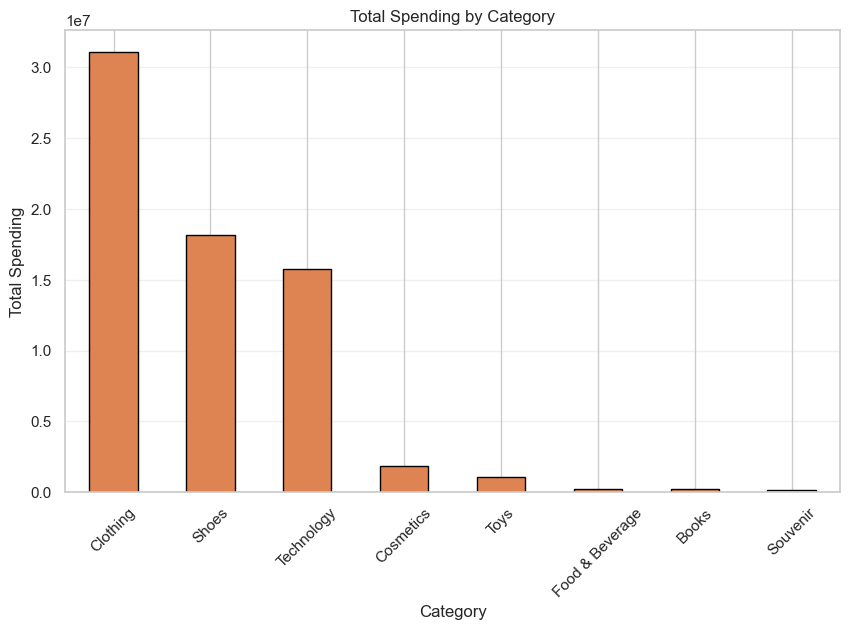

In [120]:
# Group by category and compute total, mean, and transaction count for spending
category_spending = (
    cdata.groupby('category')['price']
    .agg(['sum', 'mean', 'count'])
    .sort_values(by='sum', ascending=False)
)

print(category_spending)

# -----------------------------
# Visualisation: Total Spending by Category
# -----------------------------
plt.figure(figsize=(10,6))
category_spending['sum'].plot(
    kind='bar',
    color=age_color,       # using your corporate muted orange
    edgecolor='black'
)

plt.title('Total Spending by Category')
plt.xlabel('Category')
plt.ylabel('Total Spending')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()### Insights
- **Clothing and Shoes** generate the highest total spending, making them the strongest revenue contributors. These categories should be prioritised for marketing campaigns and seasonal promotions.
- **Technology** also shows strong spending, despite having fewer transactions. This indicates high-value purchases and a premium customer segment worth targeting.
- Categories like **Books, Souvenir, and Food & Beverage** contribute the least in total spending, suggesting they may require bundle offers or strategic promotions to drive sales.
- The combination of **high volume (count)** and **high revenue (sum)** clearly positions Clothing and Shoes as the most impactful marketing segments.


### Insights
- **Clothing and Shoes** generate the highest total spending, making them the strongest revenue contributors. These categories should be prioritised for marketing campaigns and seasonal promotions.
- **Technology** also shows strong spending, despite having fewer transactions. This indicates high-value purchases and a premium customer segment worth targeting.
- Categories like **Books, Souvenir, and Food & Beverage** contribute the least in total spending, suggesting they may require bundle offers or strategic promotions to drive sales.
- The combination of **high volume (count)** and **high revenue (sum)** clearly positions Clothing and Shoes as the most impactful marketing segments.

### Spending Distribution by Gender
We compare total spending between male and female customers using a boxplot. This helps identify whether one gender contributes more revenue or exhibits higher variability in spending behaviour.

C:\Users\saira\AppData\Local\Temp\ipykernel_25916\2074030929.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


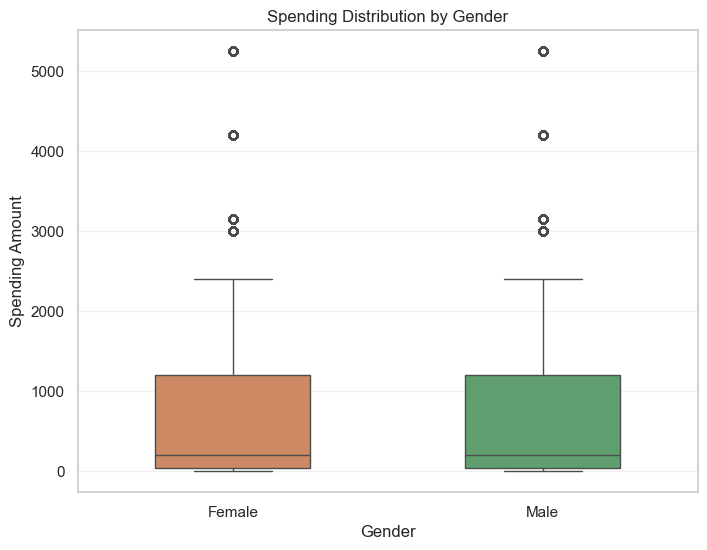

In [124]:
# -----------------------------
# Spending Distribution by Gender
# -----------------------------

plt.figure(figsize=(8,6))

sns.boxplot(
    data=cdata,
    x='gender',
    y='price',
    palette={'Female': age_color, 'Male': payment_color},   # corporate palette
    width=0.5
)

plt.title('Spending Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Spending Amount')
plt.grid(axis='y', alpha=0.3)
plt.show()

### Insight
The spending distribution between male and female customers is highly similar. Both groups have comparable medians and interquartile ranges, indicating no major difference in typical spending behaviour. 

However, female customers show slightly more high-value outliers, suggesting a few premium purchases in specific categories. Overall, spending patterns are balanced across genders, meaning marketing campaigns do not need strong gender-specific targeting and can remain broadly focused.


### Relationship Between Age and Spending
We analyse whether a customer’s age influences their spending behaviour. A scatter plot helps visualise any trend or pattern, while the correlation coefficient quantifies the strength of the relationship.

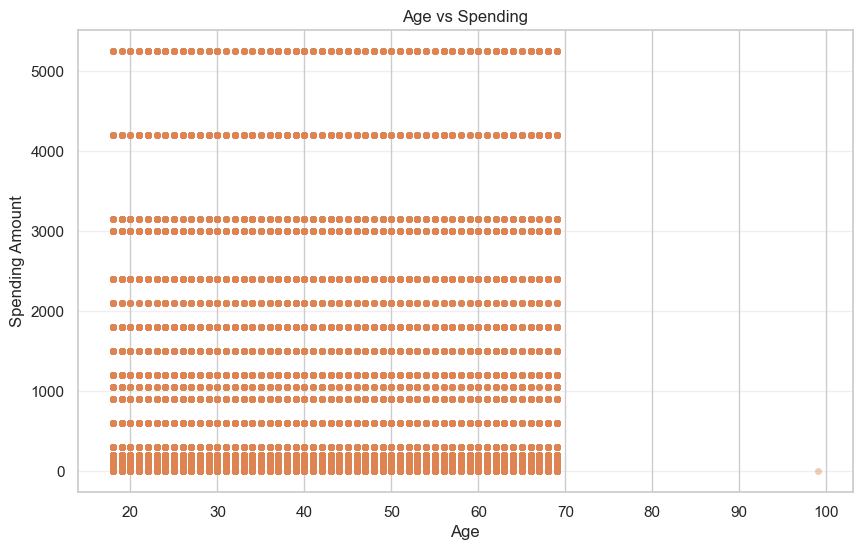

Correlation coefficient between age and spending: 0.00


In [128]:
# -----------------------------
# Scatter Plot: Age vs Spending
# -----------------------------

plt.figure(figsize=(10,6))

# Use seaborn for cleaner styling and transparency
sns.scatterplot(
    data=cdata,
    x='age',
    y='price',
    color=age_color,        # corporate muted orange
    alpha=0.4,              # transparency for overlapping points
    edgecolor=None,
    s=20                    # point size
)

plt.title('Age vs Spending')
plt.xlabel('Age')
plt.ylabel('Spending Amount')
plt.grid(axis='y', alpha=0.3)
plt.show()

# -----------------------------
# Correlation Calculation
# -----------------------------
correlation = cdata['age'].corr(cdata['price'])
print(f"Correlation coefficient between age and spending: {correlation:.2f}")


### Insight
The scatter plot shows no visible trend between age and spending, and the correlation coefficient is effectively 0.00. This indicates that customers across all age groups exhibit similar spending behaviour. High-value purchases also occur across a wide range of ages, not concentrated in any specific demographic.

Age is therefore **not a strong predictor** of spending in this dataset, meaning age-based targeting is unlikely to significantly influence marketing outcomes.

### Average Spending by Age Group
To understand how spending varies across different age segments, we group customers into five age ranges and calculate the average spending for each group. This helps identify whether specific age categories contribute more to overall revenue.

C:\Users\saira\AppData\Local\Temp\ipykernel_25916\1997727253.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cdata.groupby('age_group')['price']


  age_group  Average Spending
0     18–25        678.772206
1     26–35        686.028407
2     36–45        700.160842
3     46–55        693.323471
4       56+        686.222243


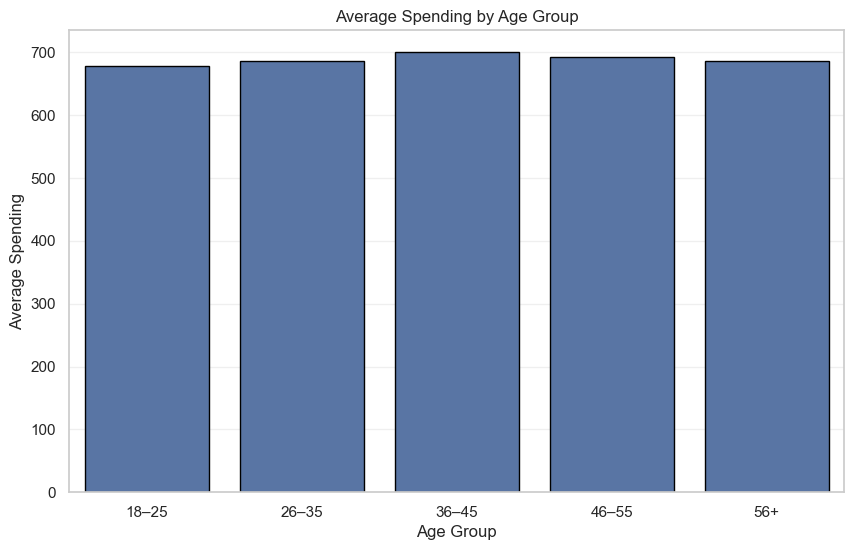

In [132]:
# -----------------------------
# Creating Age Groups
# -----------------------------

age_bins = [18, 25, 35, 45, 55, float('inf')]
age_labels = ['18–25', '26–35', '36–45', '46–55', '56+']

# Segment customers into age groups
cdata['age_group'] = pd.cut(
    cdata['age'],
    bins=age_bins,
    labels=age_labels,
    right=False
)

# -----------------------------
# Calculating Average Spending per Age Group
# -----------------------------
age_group_spending = (
    cdata.groupby('age_group')['price']
    .mean()
    .reset_index()
    .rename(columns={'price': 'Average Spending'})
)

print(age_group_spending)

# -----------------------------
# Visualisation
# -----------------------------
plt.figure(figsize=(10,6))

sns.barplot(
    data=age_group_spending,
    x='age_group',
    y='Average Spending',
    color=price_color,       # corporate steel-blue for consistency
    edgecolor='black'
)

plt.xlabel('Age Group')
plt.ylabel('Average Spending')
plt.title('Average Spending by Age Group')
plt.grid(axis='y', alpha=0.3)
plt.show()

### Insight
Average spending is relatively consistent across all age groups, with only slight variation. Customers aged **26–45** show marginally higher average spending, while both younger (18–25) and older (56+) groups spend at similar levels. 

Overall, the differences are minor, indicating that age has limited influence on how much customers spend. Marketing strategies should therefore not rely heavily on age segmentation, as spending behaviour is stable across all age categories.


### Sales by Payment Method
We calculate the total sales value for each payment method and visualise their proportions. This shows which payment options customers prefer and where to focus promotions or partnerships.

  payment_method  Total Sales
0           Cash  30703883.18
1    Credit Card  24051476.93
2     Debit Card  13795895.72


C:\Users\saira\AppData\Local\Temp\ipykernel_25916\3605189600.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cdata.groupby('payment_method')['price']


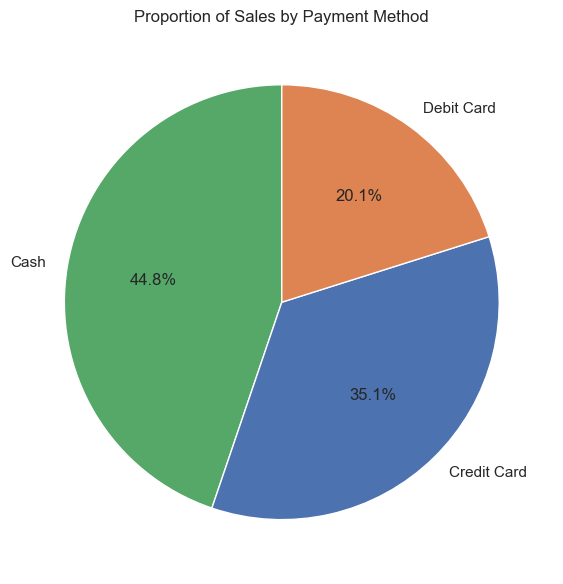

In [136]:
# -----------------------------
# Total Sales by Payment Method
# -----------------------------
payment_sales = (
    cdata.groupby('payment_method')['price']
    .sum()
    .reset_index()
    .rename(columns={'price': 'Total Sales'})
)

print(payment_sales)

# -----------------------------
# Visualisation: Proportion of Sales by Payment Method
# -----------------------------
plt.figure(figsize=(8,6))

colors = [payment_color, price_color, age_color]  # Cash, Credit, Debit

plt.pie(
    payment_sales['Total Sales'],
    labels=payment_sales['payment_method'],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white'}
)

plt.title('Proportion of Sales by Payment Method')
plt.tight_layout()
plt.show()

### Insight
Cash accounts for the largest share of sales (≈45%), followed by Credit Card (≈35%) and Debit Card (≈20%). This indicates that customers still rely heavily on cash and traditional card payments. 

The strong share of card transactions suggests room to promote bank or card-partner offers, while the continued dominance of cash highlights opportunities to encourage more digital or contactless payments.

### Monthly Sales Trend
We analyse total monthly sales to identify seasonal patterns, peaks, and drops in customer spending. Tracking sales over time helps understand business performance and highlights months with unusually high or low revenue.

   month_year  Total Sales
0     2021-01   2655372.78
1     2021-02   2358636.34
2     2021-03   2618434.14
3     2021-04   2558825.62
4     2021-05   2662343.78
5     2021-06   2547163.98
6     2021-07   2801268.26
7     2021-08   2632303.32
8     2021-09   2530305.88
9     2021-10   2782418.40
10    2021-11   2545306.39
11    2021-12   2619620.04
12    2022-01   2656012.29
13    2022-02   2317997.78
14    2022-03   2705190.76
15    2022-04   2543653.14
16    2022-05   2684394.25
17    2022-06   2613106.01
18    2022-07   2749339.95
19    2022-08   2638238.71
20    2022-09   2584908.39
21    2022-10   2755839.69
22    2022-11   2447388.60
23    2022-12   2675437.80
24    2023-01   2620053.89
25    2023-02   2558459.90
26    2023-03    683721.31


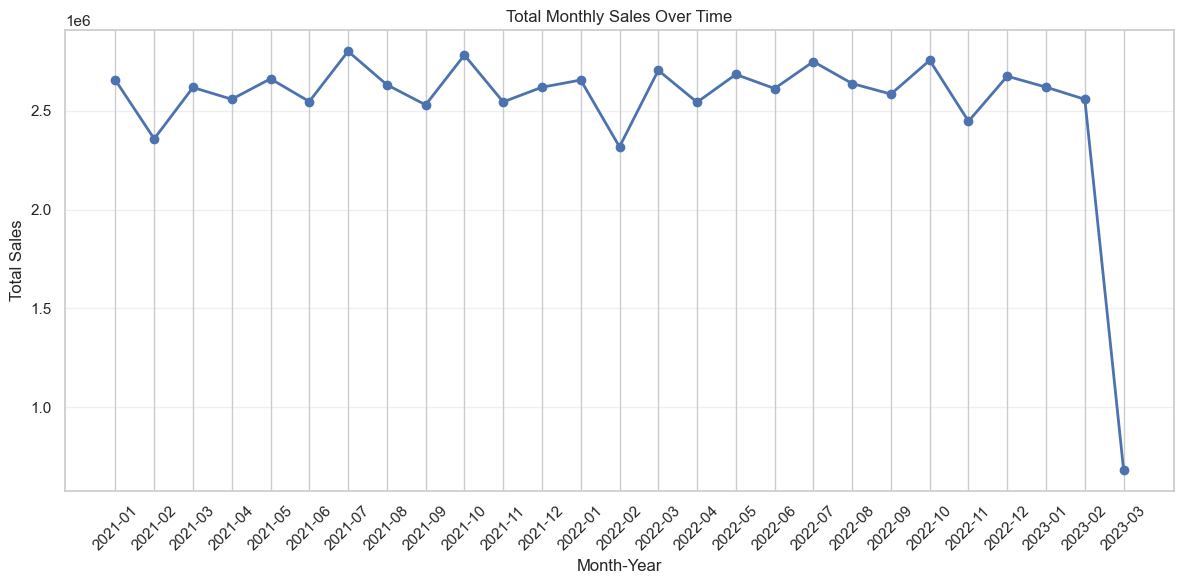

In [140]:
# -----------------------------
# Convert invoice_date to datetime and extract month-year
# -----------------------------
cdata['invoice_date'] = pd.to_datetime(cdata['invoice_date'])
cdata['month_year'] = cdata['invoice_date'].dt.to_period('M')

# -----------------------------
# Aggregate total monthly sales
# -----------------------------
monthly_sales = (
    cdata.groupby('month_year')['price']
    .sum()
    .reset_index()
    .rename(columns={'price': 'Total Sales'})
)

print(monthly_sales)

# -----------------------------
# Visualisation: Monthly Sales Trend
# -----------------------------
plt.figure(figsize=(12,6))

plt.plot(
    monthly_sales['month_year'].astype(str),
    monthly_sales['Total Sales'],
    color=price_color,     # corporate steel blue
    marker='o',
    linestyle='-',
    linewidth=2,
    markersize=6
)

plt.title('Total Monthly Sales Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


### Insight
Monthly sales remain consistently strong throughout the year, typically ranging between **2.4M and 2.8M**. There are small seasonal peaks around mid-year (June–August) and again around November, which may align with holiday shopping periods or promotional events.

A sharp drop appears in the final month, which is likely due to incomplete data rather than an actual business decline. Overall, the trend suggests stable customer demand with predictable seasonal fluctuations.

## 6. Insights Summary

1. Prioritise High-Performing Categories  
   Clothing, Shoes, and Technology contribute the majority of revenue.  
   Dibs should focus marketing campaigns, bundle offers, and inventory investment on these categories to maximise ROI.

2. Strengthen Payment Method Incentives  
   With Cash and Credit Card dominating sales, Dibs can partner with banks or card networks to offer cashback or discount promotions.  
   Encouraging digital payments may also improve checkout efficiency.

3. Leverage Predictable Sales Patterns  
   Monthly sales trends show consistent peaks around mid-year and late-year.  
   Dibs should align major advertising pushes, stock replenishment, and promotional events around these periods to amplify revenue.

4. Introduce Occasion-Based Marketing Rather Than Age-Based  
   Since spending does not vary meaningfully across age groups, focusing on customer **needs and occasions** (e.g., gifting, fashion events, technology upgrades) is more effective than demographic targeting.

5. Explore Personalised Engagement for Premium Buyers  
   High-value purchases appear frequently and across all segments.  
   Dibs can use loyalty programs, VIP outreach, or targeted recommendations to retain and grow this profitable customer segment.
